In [6]:
%timeit
import backtrader as bt
import backtrader.indicators as btind

# Create a data feed
import requests, pandas, json, datetime
def FetchMarket(symbol,since = datetime.datetime(2018,12,1)):
    (f,t) = symbol.split("/")
    res = requests.get(f"https://min-api.cryptocompare.com/data/histoday?fsym={f}&tsym={t}&limit={(datetime.datetime.now()-since).days}")
    hist = pandas.DataFrame(json.loads(res.content)['Data'])
    hist = hist.set_index('time')
    hist.index = pandas.to_datetime(hist.index, unit='s')
    hist = hist.rename(columns={'volumefrom': 'volume'})
    hist = hist[hist.high != 0][["open","high","low","close","volume"]]
    return hist
    
print(FetchMarket("BTC/USD").tail(5))


class SMA_CrossOver(bt.Strategy):

    params = (('fast', 3), ('slow', 20))

    def __init__(self):
        self.buysig={}
        for d in self.getdatanames():
            sma_fast = btind.SMA(self.getdatabyname(d), period=self.p.fast)
            sma_slow = btind.SMA(self.getdatabyname(d), period=self.p.slow)
            self.buysig[d] = btind.CrossOver(sma_fast, sma_slow)
            
    def next(self):
        for d in self.getdatanames():
            if self.getpositionbyname(d).size:
                if self.buysig[d] < 0:
                    self.sell(data=self.getdatabyname(d))

            elif self.buysig[d] > 0:
                self.buy(data=self.getdatabyname(d))
cerebro = bt.Cerebro()
cerebro.broker.setcommission(
    commission = 0.002
)

for symbol in ["BNB/USD","BTC/USD","ETH/USD"]:
    hist = FetchMarket(symbol)
    cerebro.adddata(bt.feeds.PandasData(dataname=hist, name=symbol))  

cerebro.addstrategy(SMA_CrossOver)
cerebro.addanalyzer(bt.analyzers.SharpeRatio)
cerebro.run()
print(cerebro.broker.getvalue())


                

                open      high       low     close    volume
time                                                        
2019-08-05  10978.91  11945.38  10978.89  11807.96  74748.53
2019-08-06  11807.96  12316.85  11224.10  11467.10  80694.71
2019-08-07  11467.10  12138.55  11393.98  11974.28  70893.90
2019-08-08  11974.28  12042.87  11498.04  11982.80  49871.24
2019-08-09  11982.80  12027.57  11859.71  11866.45   6064.43
17487.766922000003
                open      high       low     close    volume
time                                                        
2019-08-05  10978.91  11945.38  10978.89  11807.96  74748.53
2019-08-06  11807.96  12316.85  11224.10  11467.10  80694.71
2019-08-07  11467.10  12138.55  11393.98  11974.28  70893.90
2019-08-08  11974.28  12042.87  11498.04  11982.80  49871.24
2019-08-09  11982.80  12027.57  11859.71  11867.33   6064.43
17489.016922000003
                open      high       low     close    volume
time                                           

In [2]:
!pip install backtrader_plotting

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [1]:
try:
    #Quick workaround for avoiding the following error while using cerebro.plot
    #ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running
    %matplotlib
except (KeyboardInterrupt, SystemExit):
    raise
except Exception as e:
    print("Ignoring",e)

from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
b = Bokeh(style='bar', plot_mode='single', scheme=Tradimo())
cerebro.plot(b)
# cerebro.plot() #iplot=False


Using matplotlib backend: agg


ModuleNotFoundError: No module named 'backtrader_plotting'

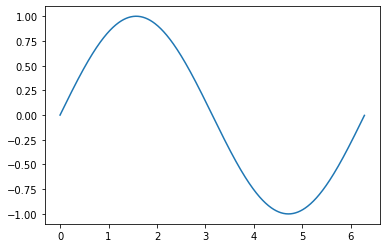

In [2]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))
def loadData():
    
    pass
# initialization function: plot the background of each frame
def init():
    line.set_ydata(np.sin(x))
    return line,

# animation function. This is called sequentially
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))
    return line,

# call the animator. blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=20,
                              blit=False)
# HTML(anim.to_html5_video())
plt.show()

